# File used to plot the top 10 probability structures

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import re

In [9]:
networks = [
    # "Davis/Davis_southern_club_women_two_mode_G",
    "clique/clique_cp",
    # "football/football",
    # "OF/OF_long_bin_Gv1",
    # "pollbooks/polbooks",
    # "surfers/surf"
    # "Twitter1/twitter_1",
    # "polblogs/polblogs",
    # "as-22july06/as-22july06",
    #     "airlines/airlines",
    # "as-22july06/as-22july06",
    # "FB circles/facebookCircles_G",
    # "FB pages/facebookPages_G",
    # "Madrid/madridTerror_G"
]

-------------------------------- 
 	 Plots for clique 
 --------------------------------
935


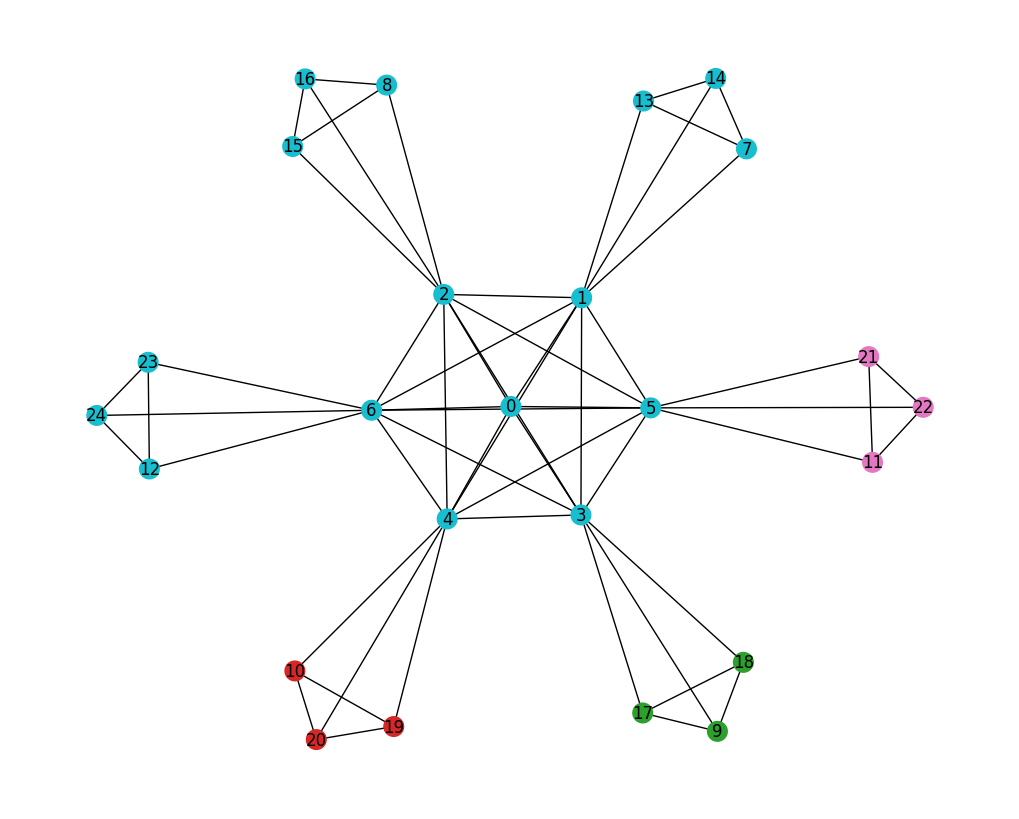

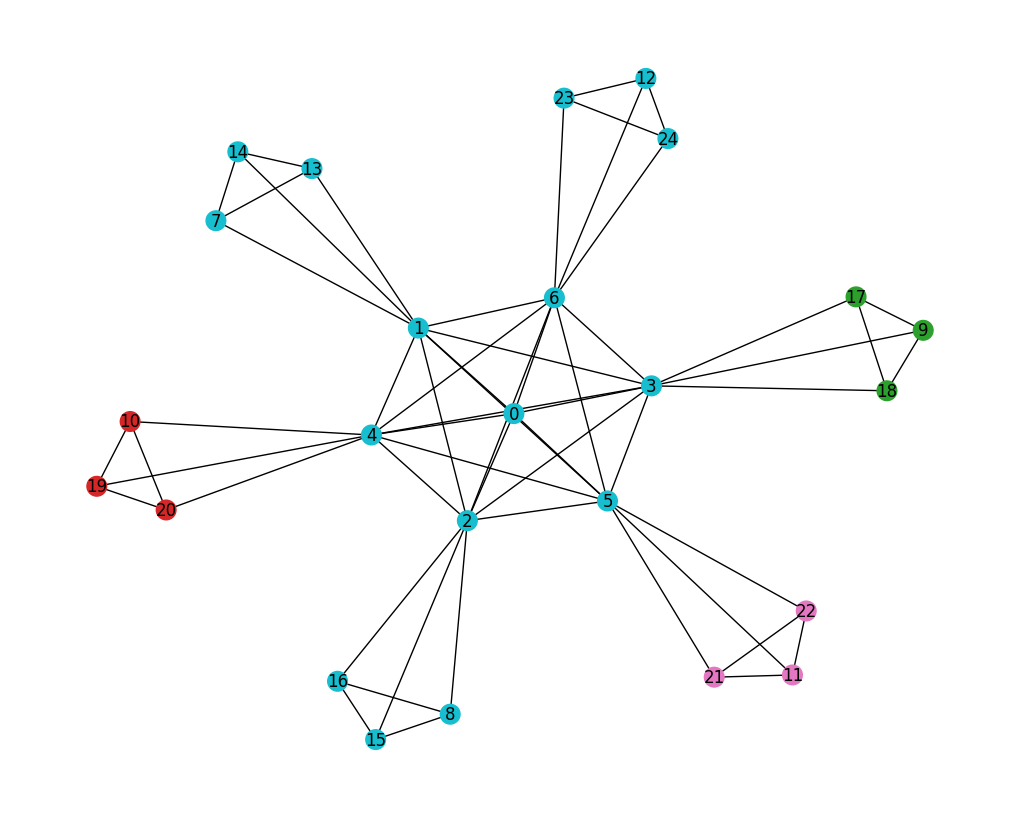

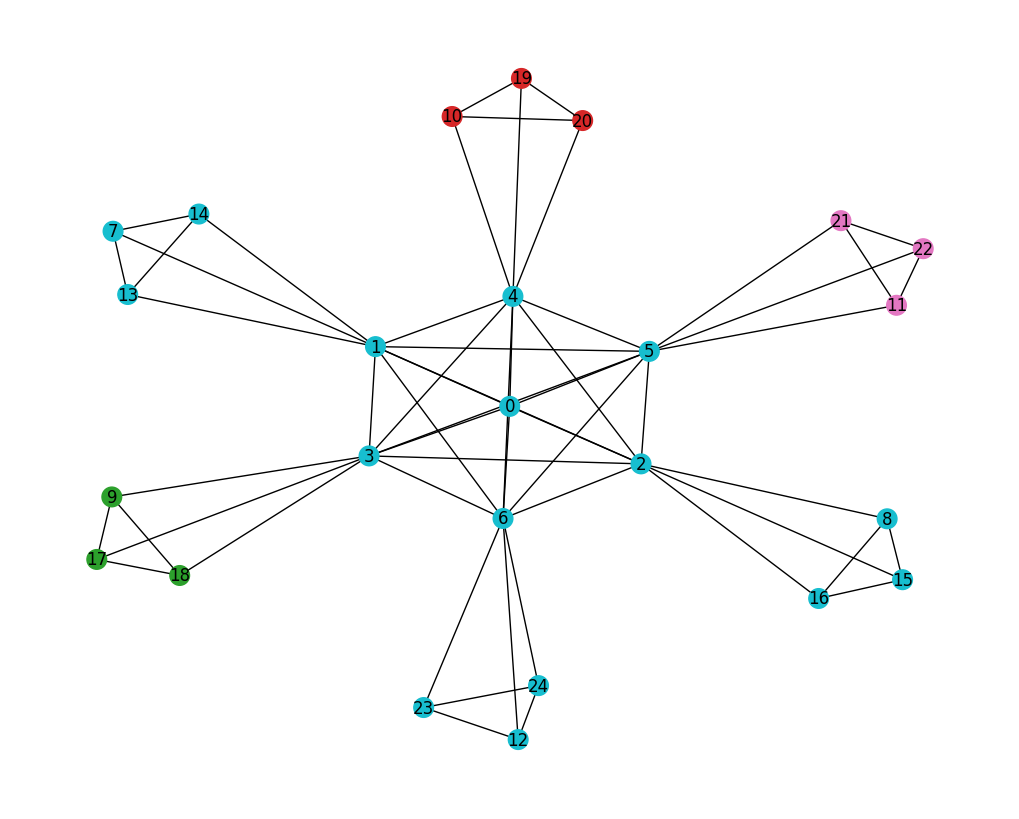

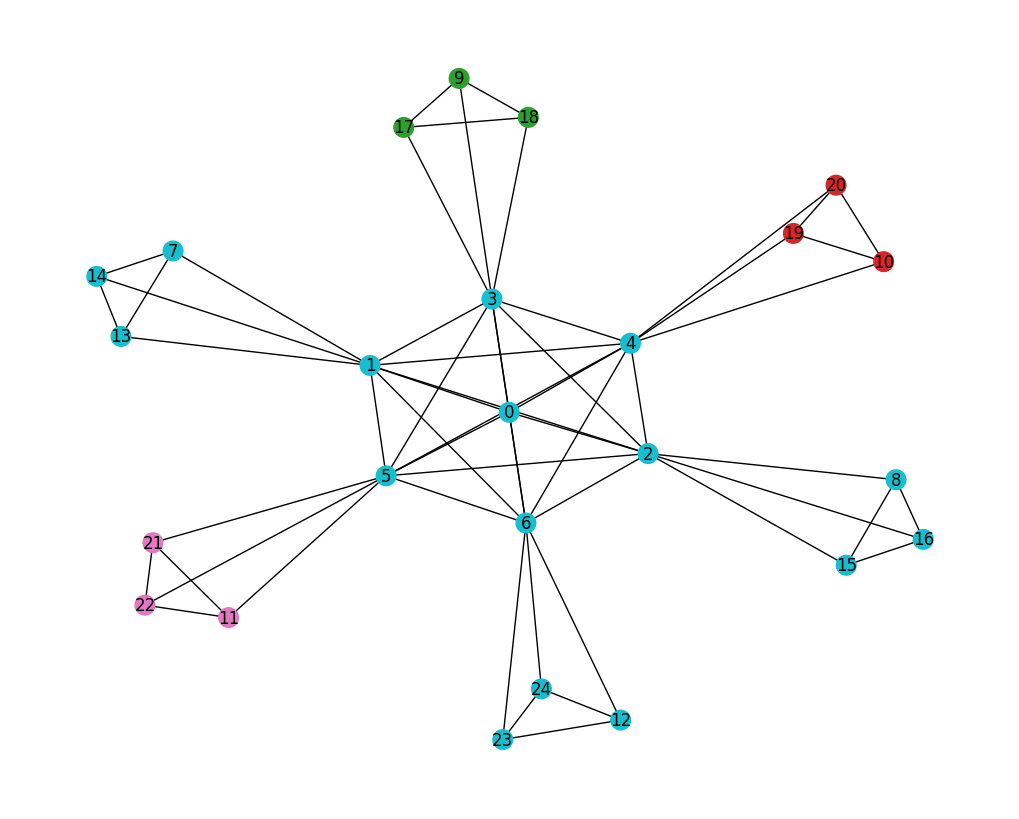

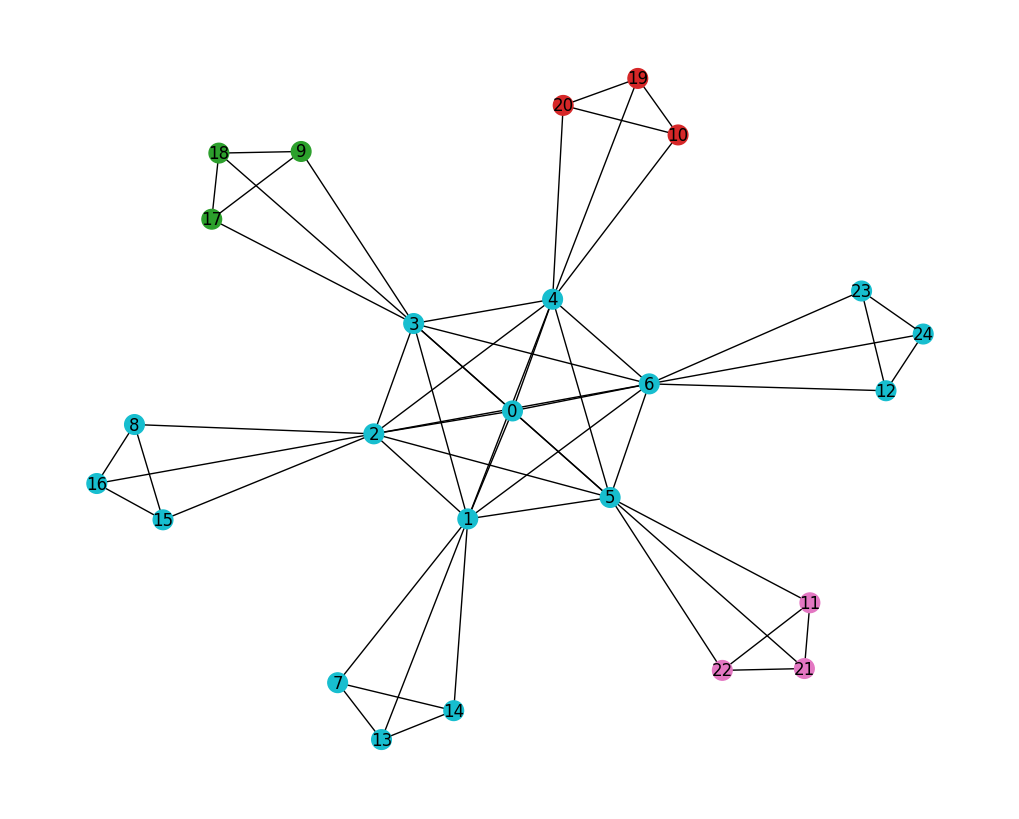

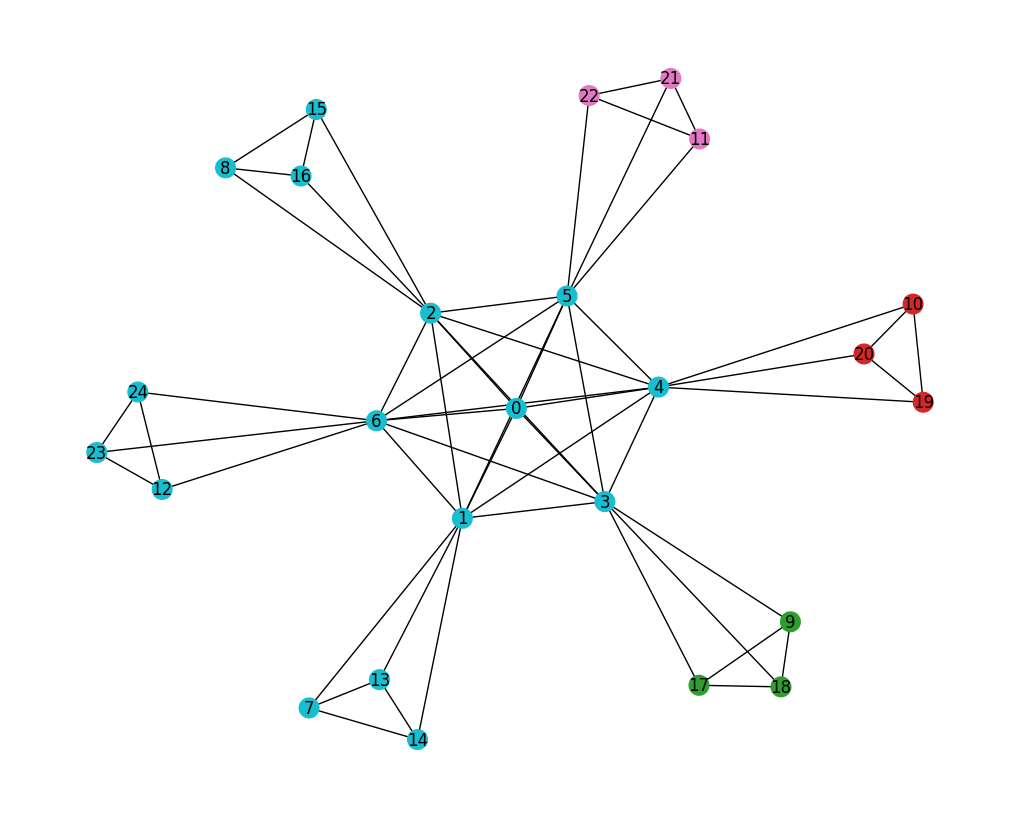

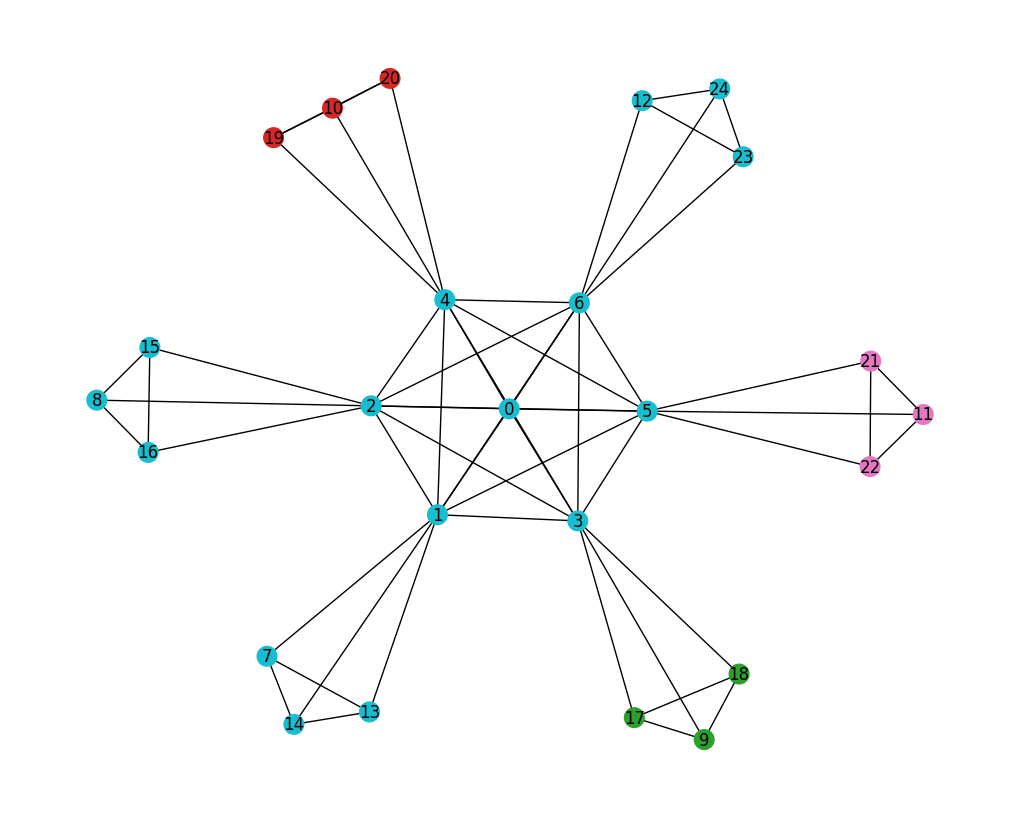

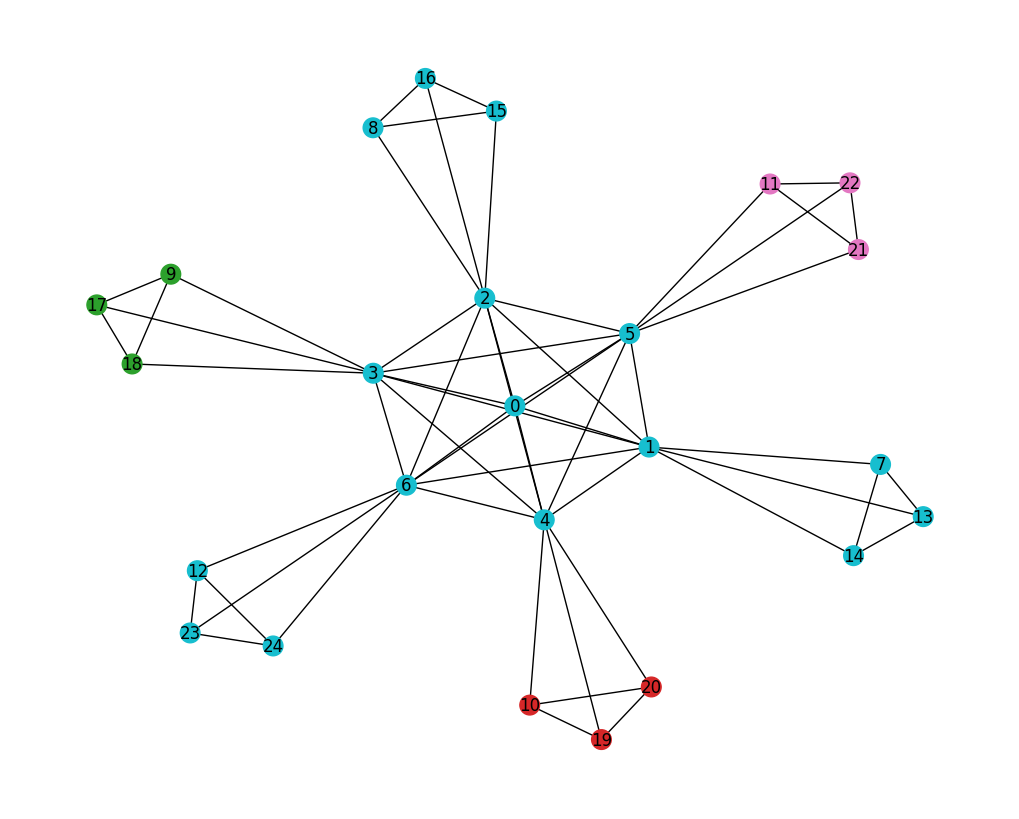

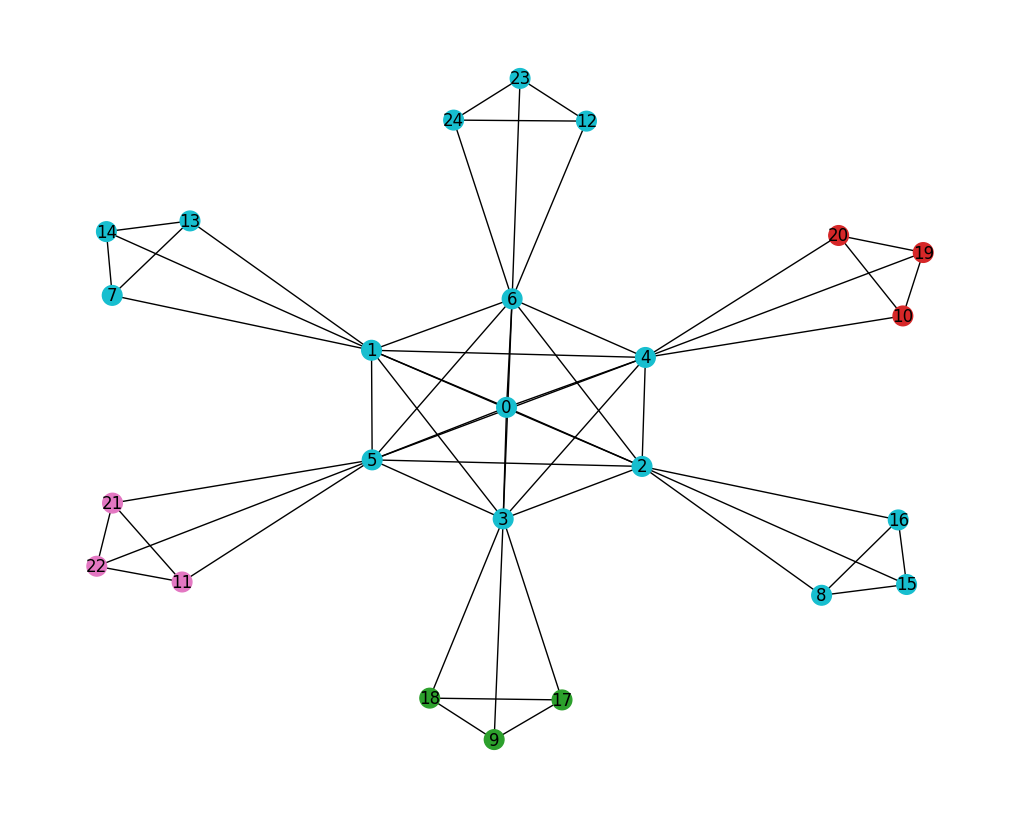

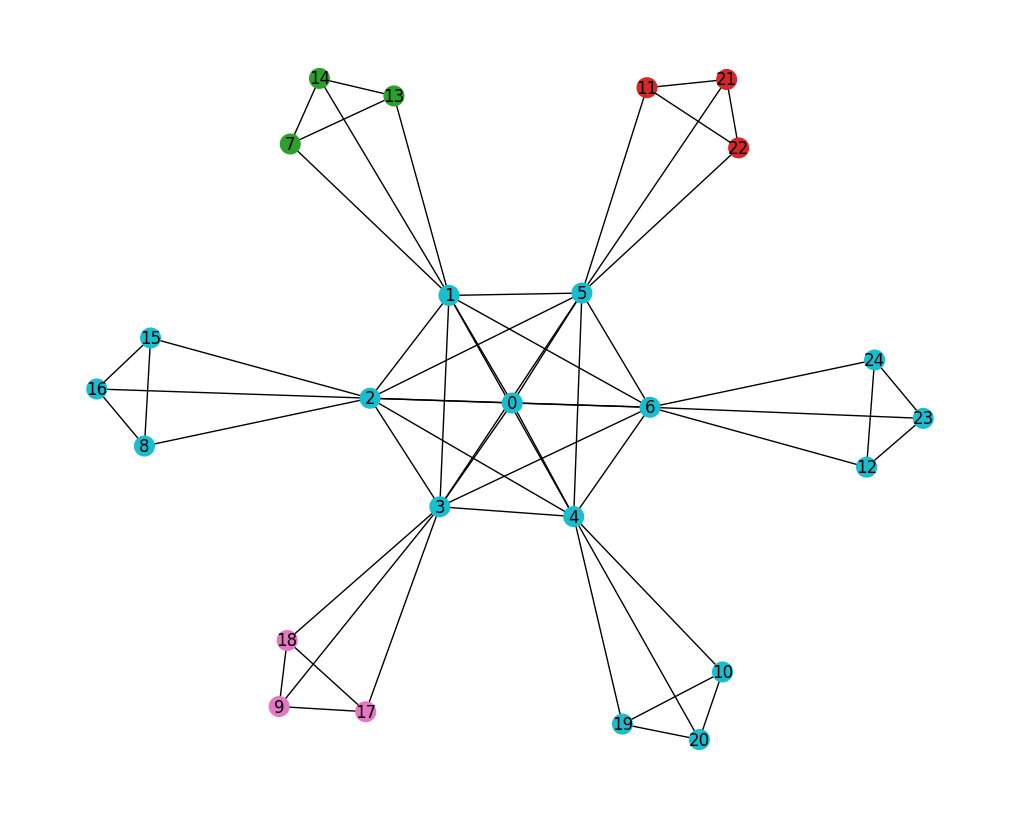

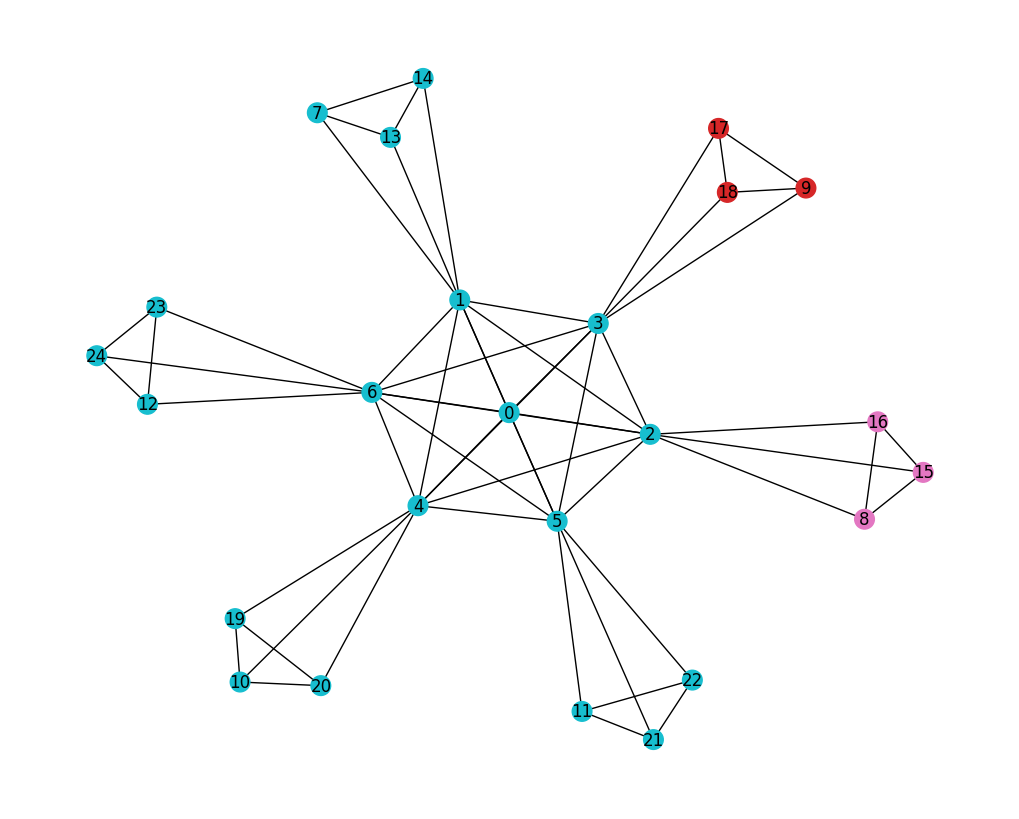

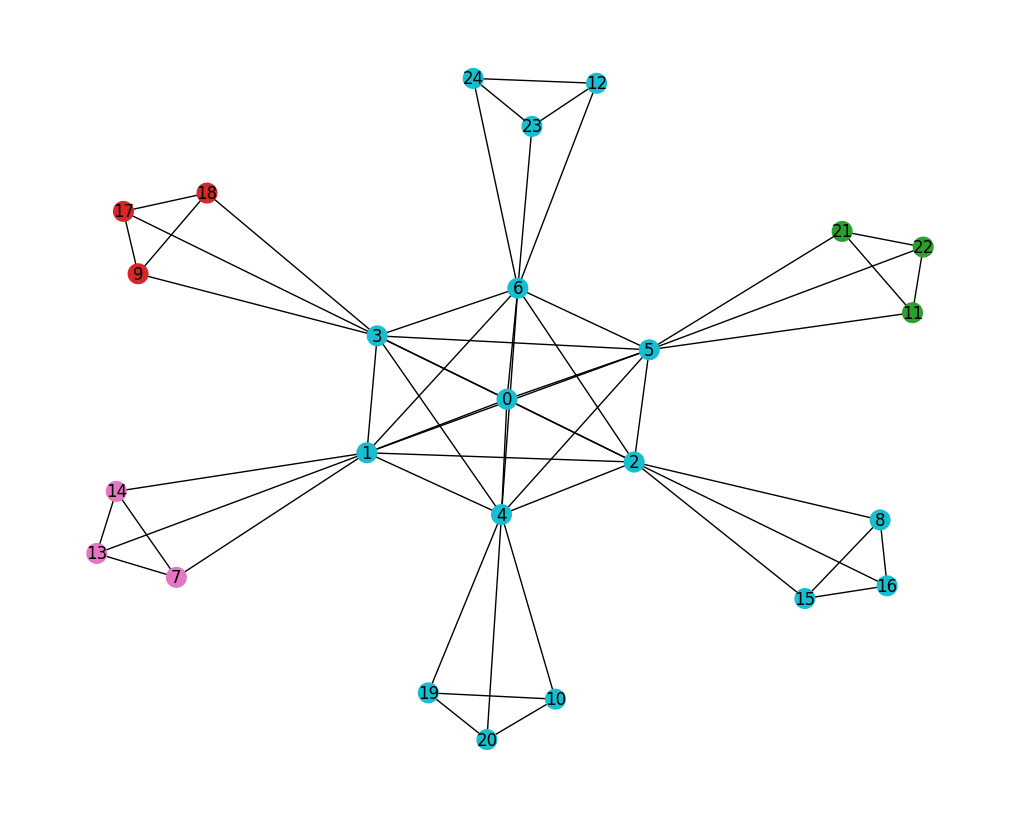

In [43]:
for network_path in networks:
    # gml
    gml_file = f"data/{network_path}.gml"
    with open(gml_file, 'r') as f:
        gml_content = f.read()
    G = nx.parse_gml(gml_content, label="id")  # id as node labels

    network, _ = network_path.split("/")

    print(f"-------------------------------- \n \t Plots for {network} \n --------------------------------")

    # json
    json_file = f"output_{network}.json"

    with open(json_file, 'r') as f:
        data = json.load(f)

    # count amount of groups
    groups = data["structures"]
    print(len(groups))

    for i in range(len(data["top_10_configs"])):
        structure = data["top_10_configs"][i]
        group_assignments = list(map(int, re.findall(r'\d+', structure)))

        # Convert group assignments to binary strings
        binary_group_assignments = ['{:b}'.format(group) for group in group_assignments]

        # Map binary strings to RGB values
        cmap = plt.get_cmap("tab10", len(set(binary_group_assignments)) + 2)
        colors = [cmap(int(binary, 2)) for binary in binary_group_assignments]

        pos = nx.fruchterman_reingold_layout(G)


        plt.figure(figsize=(10, 8))
        nx.draw(G, pos, with_labels=True, node_size=200, node_color=colors)
        # plt.title("Network with Binary Group Assignments")
        plt.show()

In [34]:
binary_group_assignments

['1000001',
 '1000011',
 '1100001',
 '1001001',
 '11000001',
 '1000101',
 '1010001',
 '11',
 '100001',
 '1001',
 '10000001',
 '101',
 '10001',
 '11',
 '11',
 '100001',
 '100001',
 '1001',
 '1001',
 '10000001',
 '10000001',
 '101',
 '101',
 '10001',
 '10001']